In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
import nltk
import pickle

In [ ]:
train = pd.read_csv('/content/train_tweet.csv')
test = pd.read_csv('/content/test_tweets.csv')

print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [ ]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [ ]:
# checking out the positive comments from the train set

train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
# checking out the negative comments from the train set 

train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


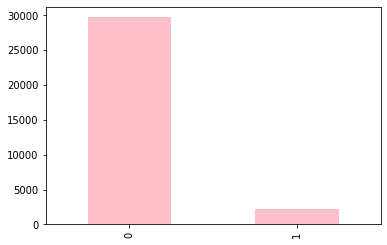

In [ ]:
train['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4)) # Counting positive and negative comments in training data

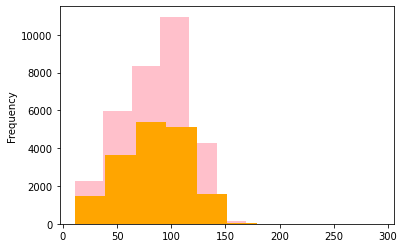

In [ ]:
# checking the distribution of tweets in the data --> Length vs Frequency

length_train = train['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [ ]:
# adding a column to represent the length of the tweet

train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [ ]:
train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

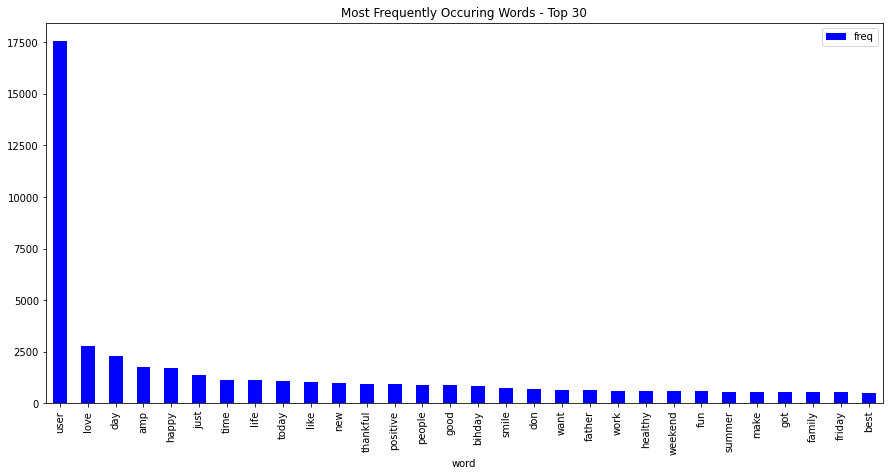

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet) # vectorizing all the tweets in training data and eliminating the english 
                                      #stop words( commonly used words in english language such as a, the, and, etc... since they dont have high contribution in the sentiment behind the statements )

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

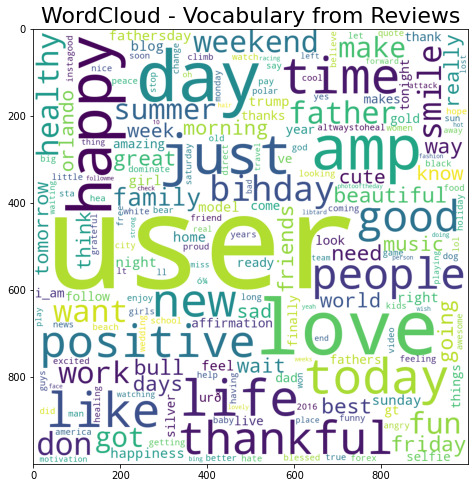

In [ ]:
from wordcloud import WordCloud

# Creating overall word cloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

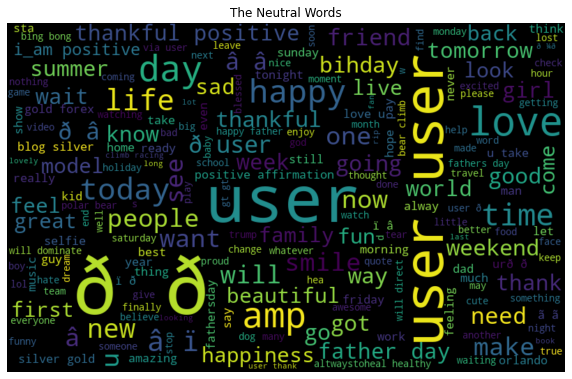

In [ ]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

# Creating word cloud of positive words

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()


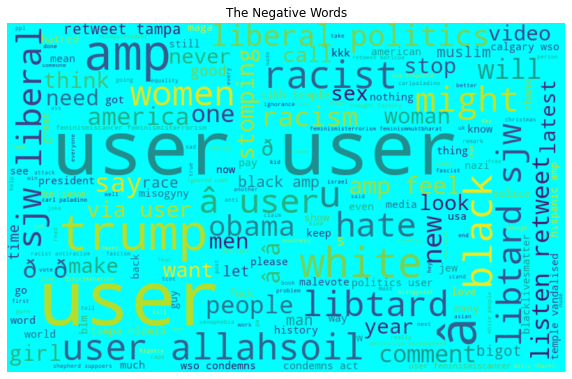

In [ ]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

# Creating word cloud of negative words

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()


In [ ]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

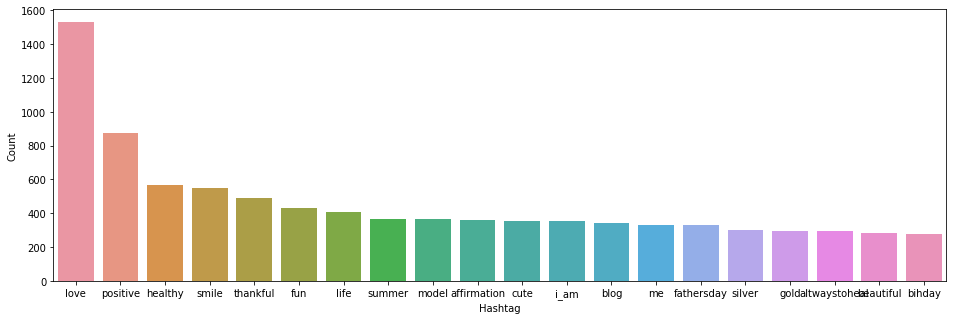

In [ ]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent positive hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

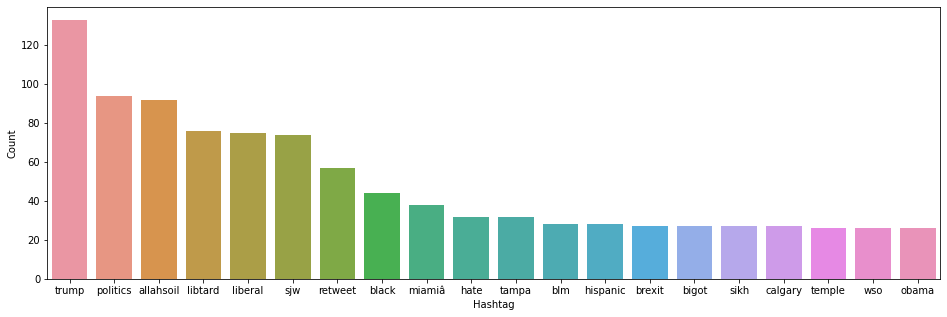

In [ ]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent negative hashtags
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split())

# importing gensim - an open source library used for natural language processing
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model--- to find most related words
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(6109733, 8411580)

In [ ]:
model_w2v.wv.most_similar(positive = "dinner") # Returns top 10 words with highest similarity score


[('spaghetti', 0.6573621034622192),
 ('#prosecco', 0.6199990510940552),
 ('podium', 0.6087929010391235),
 ('#wanderlust', 0.6060436964035034),
 ('#boardgames', 0.6002641916275024),
 ('shopping!', 0.5975826978683472),
 ('#pamper', 0.5939729809761047),
 ('7!', 0.5934471487998962),
 ('chills', 0.5928254127502441),
 ('charlie', 0.5911266803741455)]

In [ ]:
model_w2v.wv.most_similar(positive = "cancer")

[('champion,', 0.7334303855895996),
 ('level.', 0.7307794094085693),
 ('wise"', 0.7233777046203613),
 ('law.', 0.7223358154296875),
 ('ways.', 0.7215444445610046),
 ('ownership', 0.7175993919372559),
 ('disregard', 0.7155121564865112),
 ('harassment', 0.7149654626846313),
 ('#guncontrolplease', 0.7074705958366394),
 ('roots', 0.7047197818756104)]

In [ ]:
model_w2v.wv.most_similar(positive = "apple")

[('"mytraining"', 0.7224586009979248),
 ('mytraining', 0.7102780342102051),
 ('training"', 0.6976966857910156),
 ('app,', 0.6510647535324097),
 ('app', 0.6082073450088501),
 ('"my', 0.596474826335907),
 ('heroku', 0.5885399580001831),
 ('#expressjs', 0.5765063166618347),
 ('ta', 0.5716742277145386),
 ("'til", 0.5714260339736938)]

In [ ]:
model_w2v.wv.most_similar(negative = "hate")

[('#apple', 0.00889541581273079),
 ('#games', -0.014285076409578323),
 ('#yay', -0.04513982683420181),
 ('stas', -0.05948668718338013),
 ('#hype', -0.0690857321023941),
 ('#fundraising', -0.07321058958768845),
 ('now.', -0.07806164026260376),
 ('season', -0.08005274832248688),
 ('hands', -0.08130831271409988),
 ('â\x80¦', -0.0844174176454544)]

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [ ]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.


[LabeledSentence(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 LabeledSentence(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 LabeledSentence(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandn

In [ ]:
# removing unwanted patterns from the data
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming --> to remove unnecessary words/expressions
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [ ]:
train_corpus

['user father dysfunct selfish drag kid dysfunct run',
 'user user thank lyft credit use caus offer wheelchair van pdx disapoint getthank',
 'bihday majesti',
 'model love u take u time ur',
 'factsguid societi motiv',
 'huge fan fare big talk leav chao pay disput get allshowandnogo',
 'user camp tomorrow user user user user user user user danni',
 'next school year year exam think school exam hate imagin actorslif revolutionschool girl',
 'love land allin cav champion cleveland clevelandcavali',
 'user user welcom gr',
 'ireland consum price index mom climb previou may blog silver gold forex',
 'selfish orlando standwithorlando pulseshoot orlandoshoot biggerproblem selfish heabreak valu love',
 'get see daddi today day gettingf',
 'user cnn call michigan middl school build wall chant tcot',
 'comment australia opkillingbay seashepherd helpcovedolphin thecov helpcovedolphin',
 'ouch junior angri got junior yugyoem omg',
 'thank paner thank posit',
 'retweet agre',
 'friday smile around

In [ ]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [ ]:
test_corpus

['studiolif aislif requir passion dedic willpow find newmateri',
 'user white supremacist want everyon see new bird movi',
 'safe way heal acn altwaystoh healthi heal',
 'hp curs child book reserv alreadi ye harrypott pottermor favorit',
 'rd bihday amaz hilari nephew eli ahmir uncl dave love miss',
 'choos momtip',
 'someth insid die eye ness smokeyey tire lone sof grung',
 'finish tattoo ink ink loveit thank aleee',
 'user user user never understand dad left young deep inthefeel',
 'delici food lovelif capetown mannaepicur restur',
 'dayswast narcosi infinit ep make awar grind neuro bass lifestyl',
 'one world greatest spo event leman teamaudi',
 'half way websit allgoingwel',
 'good food good life enjoy call garlic bread iloveit',
 'stand behind guncontrolpleas senselessshoot takethegun comicrelief stillsad',
 'ate ate ate jamaisasthi fish curri prawn hilsa foodfestiv foodi',
 'user got user limit edit rain shine set today user user user user',
 'amp love amp hug amp kiss keep babi 

In [ ]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [ ]:
x, y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]), 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 31957    0
 31958    0
 31959    0
 31960    1
 31961    0
 Name: label, Length: 31962, dtype: int64)

In [ ]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [ ]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train) #improve the quality of your data #x-u/sd
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)
print(x_train)

[[-0.02889703 -0.04482922 -0.03984678 ... -0.01864841 -0.02436517
  -0.02142658]
 [-0.02889703 -0.04482922 -0.03984678 ... -0.01864841 -0.02436517
  -0.02142658]
 [-0.02889703 -0.04482922 -0.03984678 ... -0.01864841 -0.02436517
  -0.02142658]
 ...
 [-0.02889703 -0.04482922 -0.03984678 ... -0.01864841 -0.02436517
  -0.02142658]
 [-0.02889703 -0.04482922 -0.03984678 ... -0.01864841 -0.02436517
  -0.02142658]
 [-0.02889703 -0.04482922 -0.03984678 ... -0.01864841 -0.02436517
  -0.02142658]]


In [ ]:
x_test

array([[-0.02889703, -0.04482922, -0.03984678, ..., -0.01864841,
        -0.02436517, -0.02142658],
       [-0.02889703, -0.04482922, -0.03984678, ..., -0.01864841,
        -0.02436517, -0.02142658],
       [-0.02889703, -0.04482922, -0.03984678, ..., -0.01864841,
        -0.02436517, -0.02142658],
       ...,
       [-0.02889703, -0.04482922, -0.03984678, ..., -0.01864841,
        -0.02436517, -0.02142658],
       [-0.02889703, -0.04482922, -0.03984678, ..., -0.01864841,
        -0.02436517, -0.02142658],
       [-0.02889703, -0.04482922, -0.03984678, ..., -0.01864841,
        -0.02436517, -0.02142658]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train)) 
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set  
#f1 returns value of how much a model that perfectly classifies each observation into the correct class 
#harmonic mean of recall and precision
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix #performance of a classification algorithm
cm = confusion_matrix(y_valid, y_pred)
print(cm)  #tp fn   fp tn 

pickle.dump(model, open('model.pkl','wb'))

Training Accuracy : 0.9851487213716574
Validation Accuracy : 0.9416843949443123
f1 score : 0.5933682373472949
[[7185  247]
 [ 219  340]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9315479914904268
f1 score : 0.5336743393009378
[[7131  301]
 [ 246  313]]
